# Applied Data Science Capstone Project
## Accident Severity Prediction
***
### Table of Contents
+ Introduction : Business Problem
+ Data
+ Modeling
+ Model Evaluation
+ Results and Discussion

### Introduction/Business Problem 

Road accidents are extremely common and they often lead to loss of property and even life. Hence its good to have a tool that can alert the drivers to be more careful depending on the weather and road conditions. If the severity is high the driver can decide whether to be extra cautious or delay the trip if possible.
This tool can also help the police to enforce more safety protocols.

The goal of this project is to predict road accident severity depending on certain weather and road conditions and time of the day.
The data set used for training the model is the one recorded by the Seattle Department of Transportation(SDOT) which includes all types of collisions from 2004 to present.
It has around 194673 records with 38 attributes.

### Data

We will be using the shared data, ie. the collision data recorded by the Seattle Department of Transportation(SDOT) which is avialable at - 
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


Inorder to develop a Accident Severity Predicting Model, we will be considering the following Attributes.

+ WEATHER - A description of the weather conditions during the time of the collision.
+ ROADCOND - The condition of the road during the collision.
+ LIGHTCOND - The light conditions during the collision.


The target is the Severity of collision which is represented by column :

+ SEVERITYCODE - A code that corresponds to the severity of the collision

We have two possible outcomes for this in our data set :
1 - Property Damage Only Collision
2 - Injury Collision


In [1]:
#import required libraries
import pandas as pd
import numpy as np


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
mpl.style.use('ggplot')

#### Data Collection

In [3]:
#data file - shared data for SDOT 
data_file = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"

In [4]:
#read data from file to pandas data frame
df = pd.read_csv(data_file)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Data Understanding

In [5]:
df.shape

(194673, 38)

In [6]:
#Checking the data types
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
df["SEVERITYDESC"].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

#### Data Preparation and Pre-processing

In [9]:
#Creating a new df with the independnet variables(attributes) and target variable
df_final = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND','LIGHTCOND']].copy()
df_final.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [10]:
#Check for missing data
print("Missing values in each columns")
print("SEVERITYCODE : " , df_final['SEVERITYCODE'].isnull().sum(axis=0))
print("WEATHER : " , df_final['WEATHER'].isnull().sum(axis=0))
print("ROADCOND : " , df_final['ROADCOND'].isnull().sum(axis=0))
print("LIGHTCOND : " , df_final['LIGHTCOND'].isnull().sum(axis=0))

Missing values in each columns
SEVERITYCODE :  0
WEATHER :  5081
ROADCOND :  5012
LIGHTCOND :  5170


In [11]:
#Since then no. rows with missing values is less compared to total no. of records, we can drop these rows
df_final.dropna(subset=['WEATHER', 'ROADCOND','LIGHTCOND'], axis=0, inplace=True)
df_final.shape

(189337, 4)

In [12]:
#Analysing the values of Attribute - WEATHER
df_final.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  40
                          2                  15
Clear                     1               75200
                          2               35808
Fog/Smog/Smoke            1                 382
                          2                 187
Other                     1                 708
                          2                 116
Overcast                  1               18942
                          2                8739
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21949
                          2               11168
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  85
                          2                  28
Snowing                   1                 732
                          2                 169
U

([<matplotlib.axis.XTick at 0x7fb938416d30>,
 <a list of 11 Text xticklabel objects>)

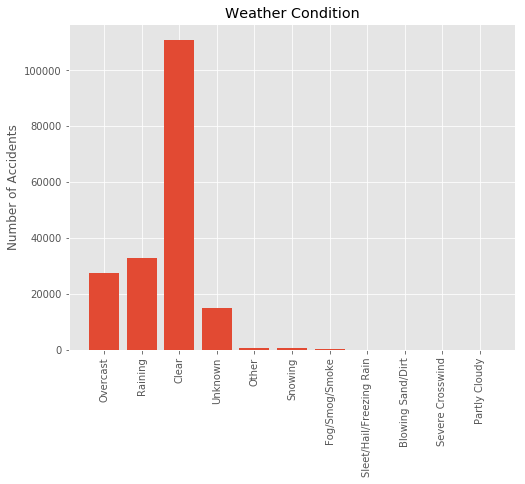

In [13]:
#Weather conditions
plt.rcParams["figure.figsize"] = (8,6)
x = Counter(df_final["WEATHER"])
y = range(len(x.values()))
plt.title("Weather Condition")
plt.ylabel("Number of Accidents")
plt.bar(y, x.values())
plt.xticks(y, x.keys(), rotation='vertical')

In [14]:
#Drop Unknown, Other and less impacting values
df_final.drop(df_final[df_final.WEATHER == 'Unknown'].index, inplace=True)
df_final.drop(df_final[df_final.WEATHER == 'Other'].index, inplace=True)
df_final.drop(df_final[df_final.WEATHER == 'Fog/Smog/Smoke'].index, inplace=True)
df_final.drop(df_final[df_final.WEATHER == 'Sleet/Hail/Freezing Rain'].index, inplace=True)
df_final.drop(df_final[df_final.WEATHER == 'Blowing Sand/Dirt'].index, inplace=True)
df_final.drop(df_final[df_final.WEATHER == 'Severe Crosswind'].index, inplace=True)
df_final.drop(df_final[df_final.WEATHER == 'Partly Cloudy'].index, inplace=True)

In [15]:
#Analysing the values of Attribute - ROADCOND
df_final.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()

ROADCOND        SEVERITYCODE
Dry             1               83182
                2               39684
Ice             1                 804
                2                 246
Oil             1                  36
                2                  24
Other           1                  62
                2                  40
Sand/Mud/Dirt   1                  42
                2                  21
Snow/Slush      1                 713
                2                 153
Standing Water  1                  75
                2                  30
Unknown         1                 796
                2                 114
Wet             1               31113
                2               15572
Name: SEVERITYCODE, dtype: int64

([<matplotlib.axis.XTick at 0x7fb938123160>,
 <a list of 9 Text xticklabel objects>)

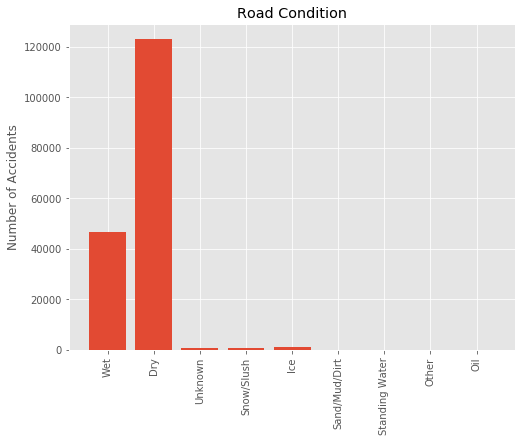

In [16]:
#Road conditions
plt.rcParams["figure.figsize"] = (8,6)
x = Counter(df_final["ROADCOND"])
y = range(len(x.values()))
plt.title("Road Condition")
plt.ylabel("Number of Accidents")
plt.bar(y, x.values())
plt.xticks(y, x.keys(), rotation='vertical')

In [17]:
#Drop Unknown, Other and less impactful values
df_final.drop(df_final[df_final.ROADCOND == 'Unknown'].index, inplace=True)
df_final.drop(df_final[df_final.ROADCOND == 'Other'].index, inplace=True)
df_final.drop(df_final[df_final.ROADCOND == 'Sand/Mud/Dirt'].index, inplace=True)
df_final.drop(df_final[df_final.ROADCOND == 'Standing Water'].index, inplace=True)
df_final.drop(df_final[df_final.ROADCOND == 'Oil'].index, inplace=True)

In [18]:
#Analysing the values of Attribute - LIGHTCOND
df_final.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1071
                          2                 313
Dark - Street Lights Off  1                 789
                          2                 305
Dark - Street Lights On   1               32188
                          2               14123
Dark - Unknown Lighting   1                   5
                          2                   3
Dawn                      1                1571
                          2                 789
Daylight                  1               74260
                          2               37948
Dusk                      1                3737
                          2                1894
Other                     1                 136
                          2                  45
Unknown                   1                2055
                          2                 235
Name: SEVERITYCODE, dtype: int64

([<matplotlib.axis.XTick at 0x7fb938847358>,
 <a list of 9 Text xticklabel objects>)

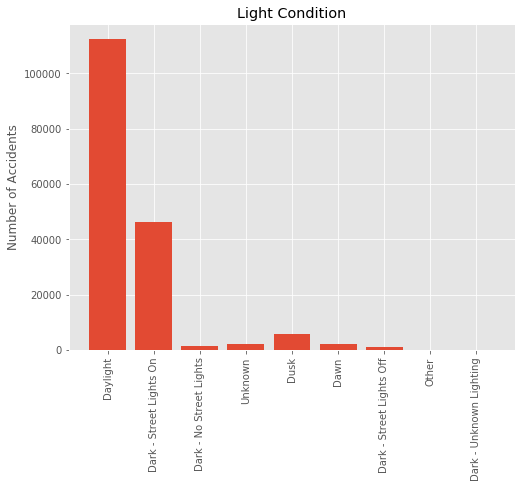

In [19]:
#Light conditions
plt.rcParams["figure.figsize"] = (8,6)
x = Counter(df_final["LIGHTCOND"])
y = range(len(x.values()))
plt.title("Light Condition")
plt.ylabel("Number of Accidents")
plt.bar(y, x.values())
plt.xticks(y, x.keys(), rotation='vertical')

In [20]:
#Drop Unknown and Other
df_final.drop(df_final[df_final.LIGHTCOND == 'Unknown'].index, inplace=True)
df_final.drop(df_final[df_final.LIGHTCOND == 'Other'].index, inplace=True)
df_final.drop(df_final[df_final.LIGHTCOND == 'Dark - No Street Lights'].index, inplace=True)
df_final.drop(df_final[df_final.LIGHTCOND == 'Dark - Street Lights Off'].index, inplace=True)
df_final.drop(df_final[df_final.LIGHTCOND == 'Dark - Unknown Lighting'].index, inplace=True)

In [21]:
df_final.shape

(166510, 4)

In [22]:
df_final.head(10)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [23]:
#Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame
#df_feature = pd.concat([df_final,pd.get_dummies(df_final[['WEATHER','ROADCOND','LIGHTCOND']])], axis=1)
wdummies = pd.get_dummies(df_final["WEATHER"])
rdummies = pd.get_dummies(df_final["ROADCOND"])
ldummies = pd.get_dummies(df_final["LIGHTCOND"])

#Merging with existing Dara Frame
df_final = df_final.join(wdummies)
df_final = df_final.join(rdummies)
df_final = df_final.join(ldummies)


In [24]:
df_feature = df_final.copy()
df_feature = df_feature.drop(['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND'],axis=1)
df_feature.head(10)

,Clear,Overcast,Raining,Snowing,Dry,Ice,Snow/Slush,Wet,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,1,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,1,0,0,1,0
7,1,0,0,0,1,0,0,0,0,0,1,0
8,1,0,0,0,1,0,0,0,0,0,1,0
9,1,0,0,0,1,0,0,0,0,0,1,0


In [25]:
df_feature.shape

(166510, 12)

**After Data Cleaning and PreProcessing, we have a 12 features/attributes.**

In [26]:
X = df_feature.copy()
X[0:5]

,Clear,Overcast,Raining,Snowing,Dry,Ice,Snow/Slush,Wet,Dark - Street Lights On,Dawn,Daylight,Dusk
0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,1,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,1,0


In [28]:
y = df_final['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

### Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [30]:
#split data into tarin and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (133208, 12) (133208,)
Test set: (33302, 12) (33302,)


In [31]:
#Normalize Data
#Data Standardization give data zero mean and unit variance 
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


#### K Nearest Neighbour

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
mean_acc

array([0.62476728, 0.66830821, 0.6326647 , 0.65863912, 0.65860909,
       0.65878926, 0.65152243, 0.66890877, 0.65449523])

In [34]:
print( "The best accuracy was with", mean_acc.max(), "with k= ", mean_acc.argmax()+1) 
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

The best accuracy was with 0.6689087742477929 with k= 8


#### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Model Evaluation

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### K Nearest Neighbour

In [38]:
yhat_neigh = neigh.predict(X_test)

In [40]:
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat_neigh))
print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, yhat_neigh))
print("F1  Accuracy : ", f1_score(y_test, yhat_neigh, average='weighted'))

Test set Accuracy :  0.6689087742477929
Jaccard Similarity Score :  0.6689087742477929
F1  Accuracy :  0.5397693598247842


#### Decision Tree

In [41]:
yhat_dtree = dTree.predict(X_test)

In [42]:
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat_dtree))
print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, yhat_dtree))
print("F1  Accuracy : ", f1_score(y_test, yhat_dtree, average='weighted'))

Test set Accuracy :  0.6707705242928352
Jaccard Similarity Score :  0.6707705242928352
F1  Accuracy :  0.5385935288157209


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression

In [43]:
yhat_LR = LR.predict(X_test)
LR_prob = LR.predict_proba(X_test)

In [44]:
print("Test set Accuracy : ", metrics.accuracy_score(y_test, yhat_LR))
print("Jaccard Similarity Score : ", jaccard_similarity_score(y_test, yhat_LR))
print("F1  Accuracy : ", f1_score(y_test, yhat_LR, average='weighted'))
print("Log Loss : ", log_loss(y_test, LR_prob))

Test set Accuracy :  0.6707705242928352
Jaccard Similarity Score :  0.6707705242928352
F1  Accuracy :  0.5385935288157209
Log Loss :  0.6483385730375678


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Results and Discussion
The above results show that almost all the three models perform the same
way. But while execution K Nearest Neighbour Model took a lot of time. So the
recommendation would be to implement either Decision Tree or Logistic
Regression.